---

title: "我是如何发明 ANOVA 的"
date: 2024-11-28
author: 罗费雪
slug: multinomial
draft: false
toc: false
tags: 统计

---

In [332]:
import numpy as np 
from collections import Counter
import pandas as pd

# np.random.seed(42)
rolls = np.random.randint(1, 7, size = 10000)
np.random.shuffle(rolls)

In [333]:
# Divide rolls into four groups randomly
group_size = len(rolls) // 4
group1 = rolls[:group_size]
group2 = rolls[group_size:2*group_size]
group3 = rolls[2*group_size:3*group_size]
group4 = rolls[3*group_size:]

group_dic = {'A': group1, 'B': group2, 'C': group3, 'D': group4}

In [334]:
def calc(group_dic):
    res = []
    for group, data in group_dic.items():
        mu = np.mean(data)
        n = len(data)
        var = np.var(data, ddof = 1)
        res.append({
            'treatment': group,
            'sample_mean': mu,
            'sample_variance': var,
            'sample_size': n
        })
    return res

res = calc(group_dic)
res = pd.DataFrame(res)
res

,treatment,sample_mean,sample_variance,sample_size
0,A,3.5088,2.869470,2500
1,B,3.5592,2.927666,2500
2,C,3.4484,2.948517,2500
3,D,3.5016,2.888753,2500


In [335]:
n = res.sample_size.sum()
k = len(group_dic)
n, k

(10000, 4)

In [336]:
grand_mean = np.sum(
    res['sample_mean'] * res['sample_size'])/n
grand_mean

3.5045

In [337]:
sstrt = np.sum(
    res['sample_size']*(res['sample_mean'] - grand_mean)**2)
sstrt

15.415500000000065

In [338]:
sserr = np.sum(
    (res.sample_size -1)*res.sample_variance
)
sserr

29074.381999999998

In [339]:
dftot = n-1
dftrt = k-1
dferr = n-k
mstrt = sstrt/dftrt
mserr = sserr/dferr
mstrt, mserr

(5.138500000000022, 2.9086016406562623)

In [340]:
f_value = mstrt/mserr
f_value

1.7666565019335656

## 模拟

In [341]:
def get_group_dic(start, end, size, k):
    # Generate random rolls
    rolls = np.random.randint(start, end + 1, size=size)
    np.random.shuffle(rolls)

    # Calculate group size
    group_size = len(rolls) // k
    remainder = len(rolls) % k  # To handle leftover elements

    # Create groups dynamically
    group_dic = {}
    start_idx = 0
    for i in range(k):
        # Determine the size of the current group
        current_group_size = group_size + (1 if i < remainder else 0)
        group_dic[chr(65 + i)] = rolls[start_idx:start_idx + current_group_size]
        start_idx += current_group_size

    return group_dic

def calc_f(group_dic):
    res = calc(group_dic)
    res = pd.DataFrame(res)
    n = res.sample_size.sum()
    k = len(group_dic)
    grand_mean = np.sum(res['sample_mean'] * res['sample_size'])/n
    sstrt = np.sum(res['sample_size']*(res['sample_mean'] - grand_mean)**2)
    sserr = np.sum((res.sample_size -1)*res.sample_variance)
    dftrt = k-1
    dferr = n-k
    mstrt = sstrt/dftrt
    mserr = sserr/dferr
    f_value = mstrt/mserr
    return f_value

In [342]:
group_dic = get_group_dic(1, 7, 10000, 4)
f = calc_f(group_dic)
f

0.3831295266028653

In [343]:
attempt = 10000
f_values = []
for _ in range(attempt):
    group_dic = get_group_dic(1, 7, 10000, 4)
    f = calc_f(group_dic)
    f_values.append(f)

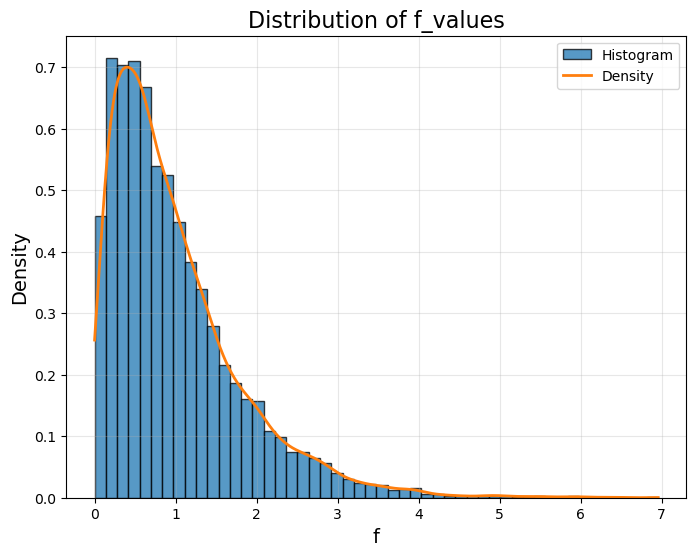

In [345]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(f_values, bins=50, density=True, alpha=0.75, edgecolor='black', label='Histogram')

# Optional: Add a density line using a kernel density estimate
from scipy.stats import gaussian_kde
density = gaussian_kde(f_values)
x_vals = np.linspace(min(f_values), max(f_values), 1000)
plt.plot(x_vals, density(x_vals), label='Density', linewidth=2)

# Customize the plot
plt.title('Distribution of f_values', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [346]:
f_values = []
for _ in range(attempt):
    group_dic = get_group_dic(1, 7, 3000, 10)
    f = calc_f(group_dic)
    f_values.append(f)

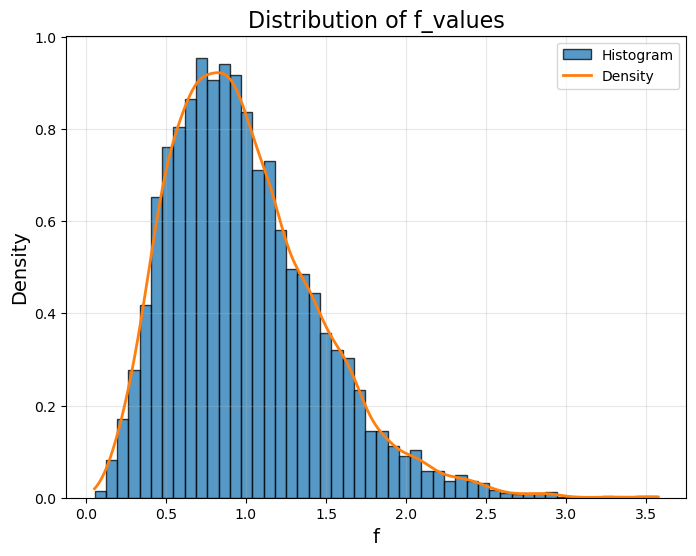

In [347]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(f_values, bins=50, density=True, alpha=0.75, edgecolor='black', label='Histogram')

# Optional: Add a density line using a kernel density estimate
from scipy.stats import gaussian_kde
density = gaussian_kde(f_values)
x_vals = np.linspace(min(f_values), max(f_values), 1000)
plt.plot(x_vals, density(x_vals), label='Density', linewidth=2)

# Customize the plot
plt.title('Distribution of f_values', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()